In [2]:
# imports

# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scaler
from sklearn.preprocessing import MinMaxScaler

# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif

# modeling
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

# decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# metrics
from sklearn.metrics import roc_curve, auc

# cross val
from sklearn.model_selection import cross_val_predict

# warnings
import warnings
warnings.filterwarnings('ignore')

# option
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Loading the data frame

In [3]:
# read csv
school_df = pd.read_csv('data/DATA.csv', delimiter=';')

# set columns

The columns are as follows:

0. Student ID
1. Student Age (1: 18-21, 2: 22-25, 3: above 26)
2. Sex (1: female, 2: male)
3. Graduated high-school type: (1: private, 2: state, 3: other)
4. Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
5. Additional work: (1: Yes, 2: No)
6. Regular artistic or sports activity: (1: Yes, 2: No)
7. Do you have a partner: (1: Yes, 2: No)
8. Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
9. Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
10. Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
11. Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
12. Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13. Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
14. Parental status: (1: married, 2: divorced, 3: died - one of them or both)
15. Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
16. Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
17. Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
18. Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
19. Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20. Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
21. Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
22. Attendance to classes (1: always, 2: sometimes, 3: never)
23. Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
24. Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
25. Taking notes in classes: (1: never, 2: sometimes, 3: always)
26. Listening in classes: (1: never, 2: sometimes, 3: always)
27. Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
28. Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
29. Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
30. Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31. Course ID
32. OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

In [4]:
# show df shape
school_df.shape

(145, 33)

In [5]:
# look at columns
columns = school_df.columns
columns

Index(['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE'],
      dtype='object')

In [6]:
# look at na values - check if any na values
na_df = school_df.isna()
na_cols = na_df.sum(axis=0)
na_rows = na_df.sum(axis=1)
print(na_cols[na_cols > 0])
print(na_rows[na_rows > 0])
# no na values, nice

Series([], dtype: int64)
Series([], dtype: int64)


# EDA - Grade distribution histogram

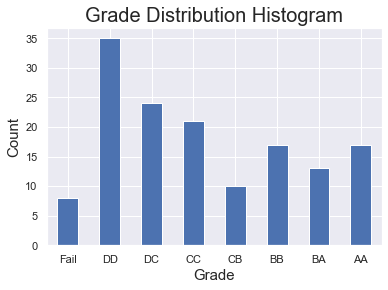

In [7]:
# grades
grades = school_df['GRADE']
counts = grades.value_counts()
counts = counts.reindex([0, 1, 2, 3, 4, 5, 6, 7])

# plot
sns.set(rc={'figure.figsize':(8, 5)})
ax = counts.plot(kind='bar', rot=0)
ax.set_xticklabels(['Fail', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA'])
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Grade Distribution Histogram', fontsize=20)
plt.savefig('images/grade_distribution')
plt.show()

## Plot Grades for Each Course

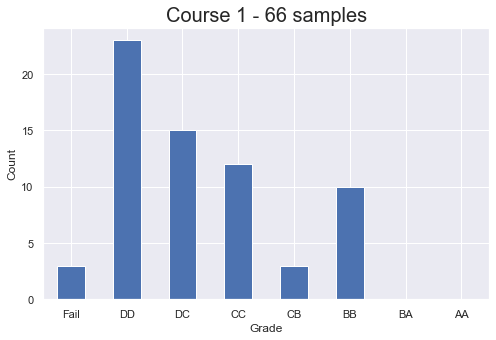

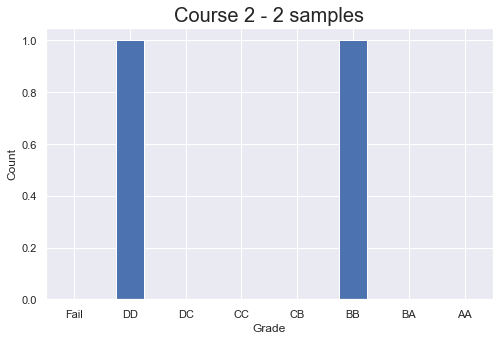

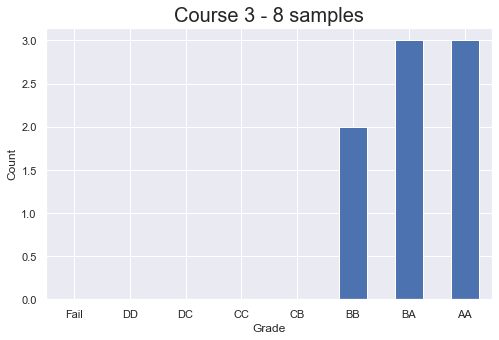

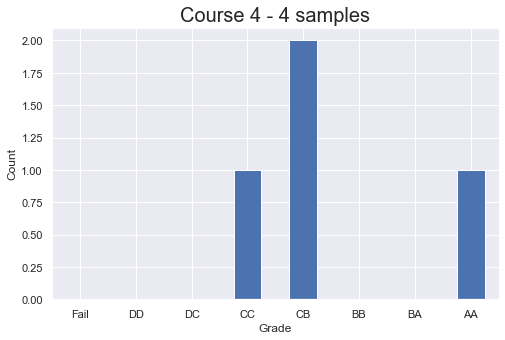

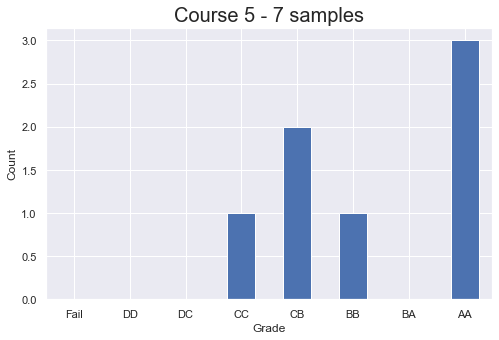

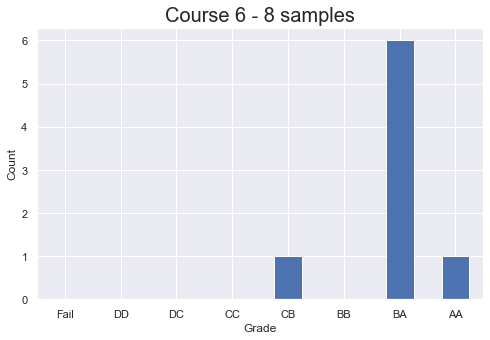

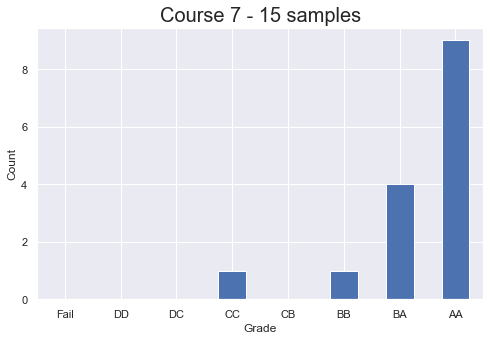

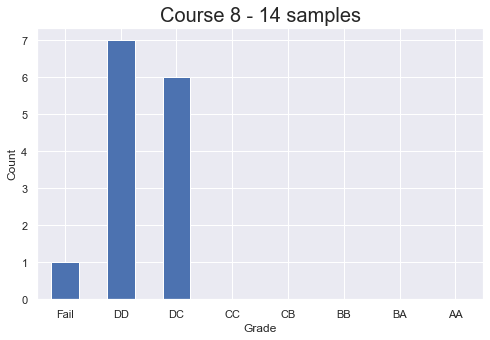

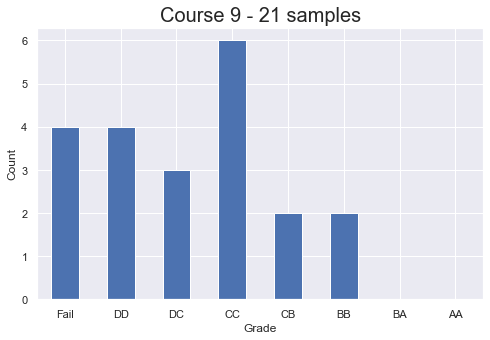

In [8]:
# make above plot for each unique course
unique_courses = school_df['COURSE ID'].unique()
for c in unique_courses:
    df = school_df[school_df['COURSE ID'] == c]
    n_samples = len(df)
    # grades
    grades = df['GRADE']
    counts = grades.value_counts()
    counts = counts.reindex([0, 1, 2, 3, 4, 5, 6, 7])

    # plot
    sns.set(rc={'figure.figsize':(8, 5)})
    ax = counts.plot(kind='bar', rot=0)
    ax.set_xticklabels(['Fail', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA'])
    plt.xlabel('')
    plt.title(f'Course {c} - {n_samples} samples', fontsize=20)
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.savefig(f'images/course_{c}')
    plt.show()

In [9]:
# summary stats when grouped by course
courses = school_df['COURSE ID']
courses.value_counts()
school_df.groupby('COURSE ID').describe()

1                                                   2             
          count      mean       std  min   25%  50%  75%  max count      mean   
COURSE ID                                                                       
1          66.0  1.787879  0.620549  1.0  1.00  2.0  2.0  3.0  66.0  1.742424  \
2           2.0  2.000000  0.000000  2.0  2.00  2.0  2.0  2.0   2.0  2.000000   
3           8.0  1.375000  0.517549  1.0  1.00  1.0  2.0  2.0   8.0  1.625000   
4           4.0  1.750000  0.500000  1.0  1.75  2.0  2.0  2.0   4.0  1.750000   
5           7.0  2.142857  0.690066  1.0  2.00  2.0  2.5  3.0   7.0  1.857143   
6           8.0  1.625000  0.517549  1.0  1.00  2.0  2.0  2.0   8.0  1.875000   
7          15.0  1.133333  0.351866  1.0  1.00  1.0  1.0  2.0  15.0  1.800000   
8          14.0  1.857143  0.534522  1.0  2.00  2.0  2.0  3.0  14.0  1.214286   
9          21.0  1.142857  0.358569  1.0  1.00  1.0  1.0  2.0  21.0  1.000000   

                                                  3                            
                std  min   25%  50%  75%  max count      mean       std  min   
COURSE ID                                                                      
1          0.440650  1.0  1.25  2.0  2.0  2.0  66.0  1.969697  0.553859  1.0  \
2          0.000000  2.0  2.00  2.0  2.0  2.0   2.0  2.500000  0.707107  2.0   
3          0.517549  1.0  1.00  2.0  2.0  2.0   8.0  2.125000  0.353553  2.0   
4          0.500000  1.0  1.75  2.0  2.0  2.0   4.0  1.500000  0.577350  1.0   
5          0.377964  1.0  2.00  2.0  2.0  2.0   7.0  2.285714  0.487950  2.0   
6          0.353553  1.0  2.00  2.0  2.0  2.0   8.0  2.000000  0.000000  2.0   
7          0.414039  1.0  2.00  2.0  2.0  2.0  15.0  1.866667  0.516398  1.0   
8          0.425815  1.0  1.00  1.0  1.0  2.0  14.0  2.000000  0.679366  1.0   
9          0.000000  1.0  1.00  1.0  1.0  1.0  21.0  1.714286  0.462910  1.0   

                                    4                                      
            25%  50%   75%  max count      mean       std  min  25%  50%   
COURSE ID                                                                  
1          2.00  2.0  2.00  3.0  66.0  3.348485  0.690427  2.0  3.0  3.0  \
2          2.25  2.5  2.75  3.0   2.0  3.000000  0.000000  3.0  3.0  3.0   
3          2.00  2.0  2.00  3.0   8.0  3.875000  0.353553  3.0  4.0  4.0   
4          1.00  1.5  2.00  2.0   4.0  3.000000  1.154701  2.0  2.0  3.0   
5          2.00  2.0  2.50  3.0   7.0  3.571429  0.786796  3.0  3.0  3.0   
6          2.00  2.0  2.00  2.0   8.0  3.125000  1.125992  1.0  3.0  3.0   
7          2.00  2.0  2.00  3.0  15.0  3.866667  0.639940  3.0  3.5  4.0   
8          2.00  2.0  2.00  3.0  14.0  3.928571  0.997249  3.0  3.0  3.5   
9          1.00  2.0  2.00  2.0  21.0  4.047619  0.740013  3.0  4.0  4.0   

                         5                                                  
            75%  max count      mean       std  min   25%  50%   75%  max   
COURSE ID                                                                   
1          3.75  5.0  66.0  1.696970  0.463090  1.0  1.00  2.0  2.00  2.0  \
2          3.00  3.0   2.0  1.500000  0.707107  1.0  1.25  1.5  1.75  2.0   
3          4.00  4.0   8.0  1.875000  0.353553  1.0  2.00  2.0  2.00  2.0   
4          4.00  4.0   4.0  1.750000  0.500000  1.0  1.75  2.0  2.00  2.0   
5          4.00  5.0   7.0  1.428571  0.534522  1.0  1.00  1.0  2.00  2.0   
6          3.25  5.0   8.0  1.750000  0.462910  1.0  1.75  2.0  2.00  2.0   
7          4.00  5.0  15.0  1.733333  0.457738  1.0  1.50  2.0  2.00  2.0   
8          5.00  5.0  14.0  1.642857  0.497245  1.0  1.00  2.0  2.00  2.0   
9          5.00  5.0  21.0  1.476190  0.511766  1.0  1.00  1.0  2.00  2.0   

              6                                                    7   
          count      mean       std  min   25%  50%   75%  max count   
COURSE ID                                                              
1          66.0  1.742424 

# Transform variables and rename columns

In [10]:
# data preprocessing
dummies_columns = ['3', '9', '10', '14', '15', '16', '21', '23', '24', '28']
df = school_df.copy()

# hs type
df['hs_private'] = df['3'].apply(lambda x: 1 if x==1 else 0)
df['hs_state'] = df['3'].apply(lambda x: 1 if x==2 else 0)
df.drop('3', axis=1, inplace=True)

# transport
df['transport_bus'] = df['9'].apply(lambda x: 1 if x==1 else 0)
df['transport_private'] = df['9'].apply(lambda x: 1 if x==2 else 0)
df['transport_bicycle'] = df['9'].apply(lambda x: 1 if x==3 else 0)
df.drop('9', axis=1, inplace=True)

# accommodation
df['accommodation_rental'] = df['10'].apply(lambda x: 1 if x==1 else 0)
df['accommodation_dorm'] = df['10'].apply(lambda x: 1 if x==2 else 0)
df['accommodation_family'] = df['10'].apply(lambda x: 1 if x==3 else 0)
df.drop('10', axis=1, inplace=True)

# parental status
df['parents_married'] = df['14'].apply(lambda x: 1 if x==1 else 0)
df['parents_divorced'] = df['14'].apply(lambda x: 1 if x==2 else 0)
df.drop('14', axis=1, inplace=True)

# mother's occupation
df['mother_retired'] = df['15'].apply(lambda x: 1 if x==1 else 0)
df['mother_housewife'] = df['15'].apply(lambda x: 1 if x==2 else 0)
df['mother_government'] = df['15'].apply(lambda x: 1 if x==3 else 0)
df['mother_private'] = df['15'].apply(lambda x: 1 if x==4 else 0)
df['mother_self'] = df['15'].apply(lambda x: 1 if x==5 else 0)
df.drop('15', axis=1, inplace=True)

# father's occupation
df['father_retired'] = df['16'].apply(lambda x: 1 if x==1 else 0)
df['father_government'] = df['16'].apply(lambda x: 1 if x==2 else 0)
df['father_private'] = df['16'].apply(lambda x: 1 if x==3 else 0)
df['father_self'] = df['16'].apply(lambda x: 1 if x==4 else 0)
df.drop('16', axis=1, inplace=True)

# impact of projects
df['projects_positive'] = df['21'].apply(lambda x: 1 if x==1 else 0)
df['projects_negative'] = df['21'].apply(lambda x: 1 if x==2 else 0)
df.drop('21', axis=1, inplace=True)

# midterm preparation 1
df['midterm_alone'] = df['23'].apply(lambda x: 1 if x==1 else 0)
df['midterm_friends'] = df['23'].apply(lambda x: 1 if x==2 else 0)
df.drop('23', axis=1, inplace=True)

# midterm preparation 2
df['midterm_cram'] = df['24'].apply(lambda x: 1 if x==1 else 0)
df['midterm_regular'] = df['24'].apply(lambda x: 1 if x==2 else 0)
df.drop('24', axis=1, inplace=True)

# flip classroom
df['flip_no'] = df['28'].apply(lambda x: 1 if x==1 else 0)
df['flip_useful'] = df['28'].apply(lambda x: 1 if x==2 else 0)
df.drop('28', axis=1, inplace=True)

# seminar attendance
df['seminar_attendance'] = df['20'].apply(lambda x: 1 if x==1 else 0)
df.drop('20', axis=1, inplace=True)

# work
df['work'] = df['5'].apply(lambda x: 1 if x==1 else 0)
df.drop('5', axis=1, inplace=True)

# sports or art
df['sports_art'] = df['6'].apply(lambda x: 1 if x==1 else 0)
df.drop('6', axis=1, inplace=True)

# partner
df['partner'] = df['7'].apply(lambda x: 1 if x==1 else 0)
df.drop('7', axis=1, inplace=True)

In [11]:
# rename the rest of the columns
new_names = {'1': 'age', '2': 'sex_male', '4': 'scholarship', '8': 'salary', '11': 'mother_education', '12': 'father_education',
            '13': 'siblings', '17': 'study_hours', '18': 'reading_ns', '19': 'reading_science', '22': 'skip_class',
             '25': 'take_notes', '26': 'listen', '27': 'discussion', '29': 'GPA_last', '30': 'GPA_grad'}
df = df.rename(columns=new_names)

# Scale features for model usage

In [12]:
# get features
features_df = df.drop(['STUDENT ID', 'COURSE ID', 'GRADE'], axis=1)
#features_df = df.drop(['STUDENT ID', 'GRADE'], axis=1) # dont drop course, see what happens


# scale using MinMax
scaler = MinMaxScaler()
features = scaler.fit_transform(features_df)

# look at new data frame
pd.DataFrame(features, columns=features_df.columns)

,age,sex_male,scholarship,salary,mother_education,father_education,siblings,study_hours,reading_ns,reading_science,skip_class,take_notes,listen,discussion,GPA_last,GPA_grad,hs_private,hs_state,transport_bus,transport_private,transport_bicycle,accommodation_rental,accommodation_dorm,accommodation_family,parents_married,parents_divorced,mother_retired,mother_housewife,mother_government,mother_private,mother_self,father_retired,father_government,father_private,father_self,projects_positive,projects_negative,midterm_alone,midterm_friends,midterm_cram,midterm_regular,flip_no,flip_useful,seminar_attendance,work,sports_art,partner
0,0.5,1.0,0.50,0.00,0.0,0.2,0.50,0.50,0.5,0.5,0.0,1.0,0.5,0.0,0.00,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.5,1.0,0.50,0.00,0.2,0.4,0.25,0.25,0.5,0.5,0.0,1.0,0.5,1.0,0.25,0.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.5,1.0,0.50,0.25,0.2,0.2,0.25,0.25,0.0,0.5,0.0,0.5,0.5,0.0,0.25,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.50,0.25,0.0,0.2,1.00,0.50,0.0,0.5,0.0,1.0,0.5,0.5,0.50,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
4,0.5,1.0,0.50,0.50,0.4,0.4,0.25,0.25,0.0,0.0,0.0,0.5,0.5,0.5,0.25,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0.5,1.0,0.50,0.25,0.4,0.4,0.25,0.00,0.0,0.5,0.0,0.0,0.5,0.0,0.75,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.75,0.00,0.0,0.4,0.00,0.25,0.5,0.5,1.0,1.0,1.0,1.0,0.75,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.50,0.25,0.6,0.4,0.00,0.00,0.5,0.5,0.0,1.0,0.5,0.5,0.00,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
8,0.5,0.0,0.50,0.00,0.2,0.6,0.25,0.00,0.5,0.5,0.0,1.0,0.5,0.5,0.75,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
9,0.5,0.0,0.50,0.50,0.0,0.2,0.50,0.25,0.5,0.5,1.0,0.5,0.5,0.5,0.00,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


# Create binary classes

grade_c is what I end up using

In [13]:
# split grades to give different class options

# pass fail option
def pass_fail(grade):
    if grade > 0:
        return 1
    else:
        return 0

# c or above option
def grade_c(grade):
    if grade >= 3:
        return 1
    else:
        return 0
    
# apply
grades = school_df['GRADE']
grades_pf = grades.apply(pass_fail)
grades_c = grades.apply(grade_c)

In [14]:
# oops, have to change this in my white paper!
len(grades_pf[grades_c==1]) / len(grades_pf)

0.5379310344827586

# Feature Significance and Selection

Comparing different feature selection methods

In [15]:
# feature selection
mi = mutual_info_classif(features, grades_c)

# the results are inconsistent, so I'll need to get an average
iters = 100
total_mi = np.zeros(features.shape[1])
for _ in range(iters):
    mi = mutual_info_classif(features, grades_c)
    total_mi += mi

avg_mi = total_mi / iters # unnecessary
sorted_indices = np.argsort(avg_mi)[::-1]
features_df.columns[sorted_indices]

Index(['GPA_last', 'sex_male', 'GPA_grad', 'skip_class', 'discussion',
       'seminar_attendance', 'flip_useful', 'flip_no', 'hs_state',
       'take_notes', 'projects_positive', 'siblings', 'reading_ns',
       'mother_education', 'scholarship', 'accommodation_dorm', 'salary',
       'study_hours', 'hs_private', 'father_government', 'midterm_cram',
       'work', 'listen', 'sports_art', 'partner', 'projects_negative',
       'father_private', 'mother_self', 'father_self', 'mother_housewife',
       'accommodation_rental', 'transport_bus', 'reading_science',
       'midterm_friends', 'parents_divorced', 'accommodation_family',
       'midterm_regular', 'transport_private', 'mother_private', 'age',
       'mother_government', 'midterm_alone', 'parents_married',
       'father_retired', 'transport_bicycle', 'mother_retired',
       'father_education'],
      dtype='object')

In [16]:
# chi squared
chi = chi2(features, grades_c)
sorted_indices = np.argsort(chi[0])[::-1]
features_df.columns[sorted_indices]

Index(['GPA_last', 'sex_male', 'skip_class', 'flip_no', 'GPA_grad',
       'hs_private', 'salary', 'projects_negative', 'flip_useful',
       'transport_bicycle', 'partner', 'seminar_attendance',
       'accommodation_dorm', 'siblings', 'work', 'transport_bus', 'discussion',
       'mother_government', 'listen', 'reading_ns', 'projects_positive',
       'hs_state', 'accommodation_rental', 'mother_private', 'midterm_friends',
       'midterm_regular', 'parents_divorced', 'take_notes', 'midterm_cram',
       'father_private', 'mother_education', 'study_hours', 'reading_science',
       'father_retired', 'sports_art', 'father_education',
       'accommodation_family', 'mother_retired', 'father_self',
       'transport_private', 'mother_housewife', 'mother_self', 'midterm_alone',
       'father_government', 'age', 'parents_married', 'scholarship'],
      dtype='object')

In [17]:
# f test
f = f_classif(features, grades_c)

sorted_indices = np.argsort(f[0])[::-1]
features_df.columns[sorted_indices]

Index(['GPA_last', 'GPA_grad', 'sex_male', 'discussion', 'seminar_attendance',
       'skip_class', 'flip_no', 'projects_positive', 'siblings', 'salary',
       'reading_ns', 'listen', 'transport_bus', 'hs_private', 'partner',
       'flip_useful', 'take_notes', 'hs_state', 'accommodation_dorm', 'work',
       'projects_negative', 'transport_bicycle', 'midterm_cram',
       'accommodation_rental', 'mother_government', 'mother_private',
       'midterm_friends', 'study_hours', 'midterm_regular', 'reading_science',
       'parents_divorced', 'mother_education', 'father_education',
       'father_private', 'sports_art', 'father_retired',
       'accommodation_family', 'mother_housewife', 'father_self',
       'transport_private', 'mother_retired', 'midterm_alone',
       'parents_married', 'scholarship', 'age', 'mother_self',
       'father_government'],
      dtype='object')

# Pipeline to determine the best model

In [18]:
# function that splits data, then finds the best model using a pipeline gridsearch

def search_optimal_model(f, g):
    # split the data into train/test
    X_train, X_test, y_train, y_test = train_test_split(f, g, test_size=0.5)

    # make scorer
    #brier_scorer = make_scorer(brier_score_loss, greater_is_better=False, needs_proba=True)


    # set up grid search
    pipe = Pipeline([
        ('select', SelectKBest(score_func=f_classif)),
        ('classify', RandomForestClassifier())
    ])

    param_grid = [
        {
            'select__k': [1, 2, 5, 10, 15, 20, 25],
            'classify': [RandomForestClassifier(), SVC(probability=True), LogisticRegression()]
        }
    ]

    grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=3, verbose=0)
    grid_search.fit(X_train, y_train)

    # which features were selected?
    mask = grid_search.best_estimator_.named_steps['select'].get_support()
    best_features = features_df.columns[mask]

    # metrics
    params = grid_search.best_params_
    #print(grid_search.predict_proba(X_test))
    score = grid_search.score(X_test, y_test)

    acc = grid_search.score(X_test, y_test)

    # compare to base rate prediction
    rate_1 = len(y_train[y_train==1]) / len(y_train)
    if rate_1 > 0.5:
        guess = 1
    else:
        guess = 0
        
    base_rate = len(y_test[y_test==guess]) / len(y_test)

    return best_features, params, score, base_rate

# example
f, p, s, b = search_optimal_model(features, grades_c)
print(list(f))
print(p)
print(s)
print(b)

['sex_male', 'salary', 'siblings', 'reading_ns', 'reading_science', 'skip_class', 'listen', 'discussion', 'GPA_last', 'GPA_grad', 'hs_private', 'transport_bus', 'transport_private', 'accommodation_dorm', 'accommodation_family', 'mother_retired', 'father_government', 'father_private', 'projects_positive', 'midterm_friends', 'flip_no', 'flip_useful', 'seminar_attendance', 'work', 'sports_art']
{'classify': RandomForestClassifier(), 'select__k': 25}
0.547945205479452
0.4794520547945205


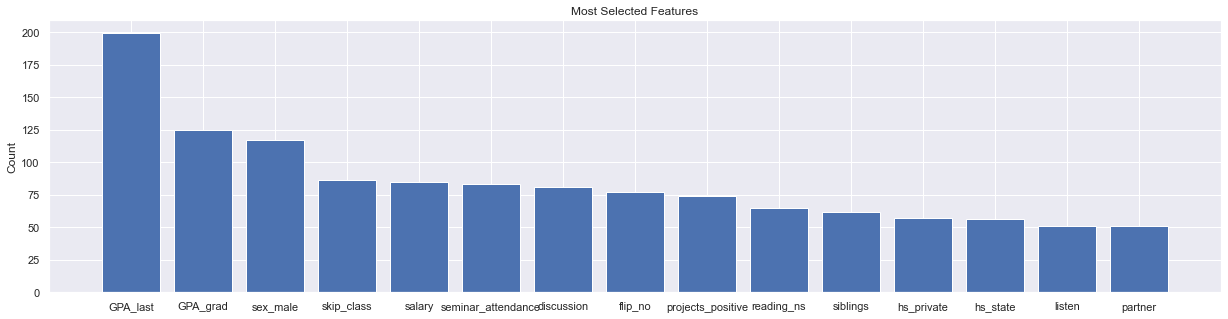

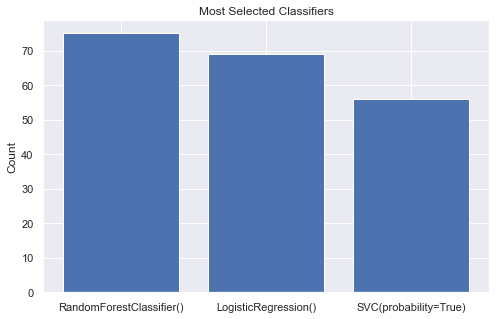

Mean Model Score: 0.6138356164383563
Mean Base Rate Score: 0.49589041095890407
% Model Beats Base Rate: 0.965


In [19]:
# perform that for n iters and save results
iters = 200
features_dict = {}
classifiers = {}
k_vals = {}
scores = []
base_rates = []
for _ in range(iters):
    best_features, parameters, score, base_rate = search_optimal_model(features, grades_c)
    # store features
    for feature in best_features:
        if feature in features_dict:
            features_dict[feature] += 1
        else:
            features_dict[feature] = 1
    features_dict = dict(sorted(features_dict.items(), key=lambda x: x[1], reverse=True))
    # store classifiers - NOT DONE AND ALSO DO K VALS 
    classifier = str(parameters['classify'])
    if classifier in classifiers:
        classifiers[classifier] += 1
    else:
        classifiers[classifier] = 1
    classifiers = dict(sorted(classifiers.items(), key=lambda x: x[1], reverse=True))
    # store k-values
    k = parameters['select__k']
    if k in k_vals:
        k_vals[k] += 1
    else:
        k_vals[k] = 1
    k_vals = dict(sorted(k_vals.items(), key=lambda x: x[1], reverse=True))
    # store scores and base rates
    scores.append(score)
    base_rates.append(base_rate)
# print    
# print(features_dict)
# print(classifiers)
# print(k_vals)
# print(scores)
# print(base_rates)

# plot instead of printing
sns.set(rc={'figure.figsize':(21, 5)})
labels = list(features_dict.keys())
values = list(features_dict.values())
plt.bar(labels[:15], values[:15])
plt.ylabel('Count')
plt.title('Most Selected Features')
plt.show()

# plot instead of printing
sns.set(rc={'figure.figsize':(8, 5)})
labels = list(classifiers.keys())
values = list(classifiers.values())
plt.bar(labels, values)
plt.ylabel('Count')
plt.title('Most Selected Classifiers')
plt.show()

# show mean performance vs base rate
print(f'Mean Model Score: {np.mean(scores)}')
print(f'Mean Base Rate Score: {np.mean(base_rates)}')
print(f'% Model Beats Base Rate: {len(np.where(np.array(scores) > np.array(base_rates))[0]) / len(scores)}')

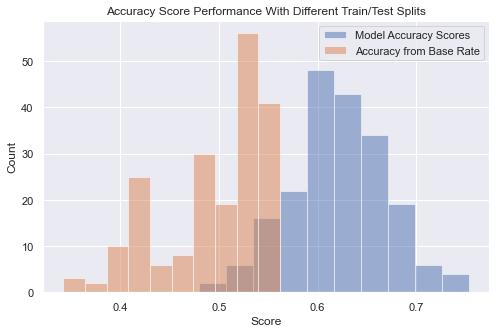

In [20]:
# performance histograms
plt.hist(scores, alpha=0.5, label='Model Accuracy Scores')
plt.hist(base_rates, alpha=0.5, label='Accuracy from Base Rate')
plt.legend()
plt.title('Accuracy Score Performance With Different Train/Test Splits')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Train some models and look at results

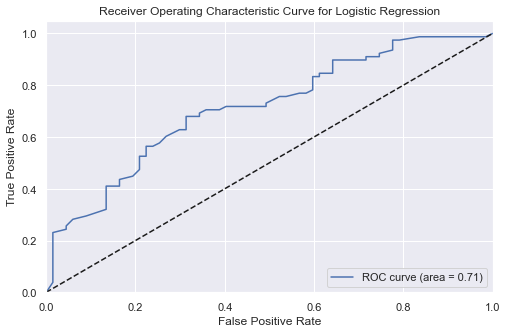

[[1.77846533 0.54116949 0.71050519]]


In [27]:
# logistic regressor using the best features
features = features_df[['GPA_last', 'GPA_grad', 'sex_male']]
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
reg = LogisticRegression()
probs = cross_val_predict(reg, features, grades_c, cv=5, method='predict_proba')[:, 1]
#reg.fit(features, grades_c)
#print(reg.coef_)

# compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(grades_c, probs)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# coefficients?
reg = LogisticRegression()
reg.fit(features, grades_c)
print(reg.coef_)

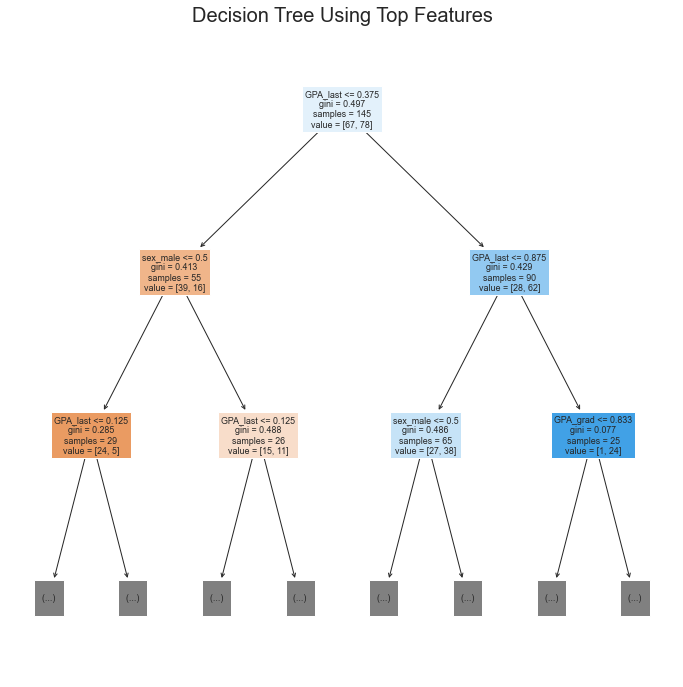

In [25]:
# decision tree using the best features
features = features_df[['GPA_last', 'GPA_grad', 'sex_male']]
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
tree = DecisionTreeClassifier()
tree.fit(features, grades_c)

# plot
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(tree, ax=ax, feature_names=['GPA_last', 'GPA_grad', 'sex_male'], filled=True, max_depth=2)
plt.title('Decision Tree Using Top Features', fontsize=20)
plt.show()